# **📌Deepchecks for Data Quality and Model Performance**


## **Scenario**

An insurance company uses a machine learning model to predict fraudulent claims in their dataset. 💼

This model helps the company detect potential fraud and minimize financial losses. However, the quality of the dataset directly affects the accuracy of the predictions. If the data is incorrect, missing, or inconsistent, the model will be less effective.

In this lab, you will work with the **Deepchecks** library to perform data integrity checks on the dataset. You will explore how data quality impacts model performance, including handling missing values, categorical features, and outliers.


## **Description:**

In this lab, you will focus on performing data integrity checks and model validation using **Deepchecks**. You will:

- Explore the dataset, ensuring it is clean and formatted properly.
- Run various integrity checks (like missing values, correlations, and data types).
- Validate the model using **Deepchecks**'s built-in model evaluation tools.
- Address any issues found in the data to improve model accuracy and reliability.

By the end of this lab, you'll gain practical experience in using data validation tools to improve your machine learning models.


## **Why Does Data Integrity Matter?**

- **Missing Values**: Missing data can lead to incorrect model predictions if not properly handled. If some information is missing in certain rows or columns, it can skew the analysis and affect the predictions.
- **Outliers**: Extreme values (outliers) in data can distort model training, leading to inaccurate results. Outliers can sometimes mislead the model into focusing too much on abnormal cases.
- **Feature Correlations**: Highly correlated features might lead to overfitting or multicollinearity, reducing model performance. This means that the model might learn redundant patterns and become too tailored to the training data, causing poor generalization to new data.


## **Problem Statement**

If the input data is of low quality, the model’s predictions will become less reliable. This can lead to poor decision-making and financial losses for the company. Detecting and correcting data issues is key to ensuring model effectiveness.


## **What is Deepchecks?**

**Deepchecks** is an open-source Python library that helps you ensure data quality and model performance through automated integrity checks. It provides:
- Automated checks for data issues like missing values, feature correlations, and outliers.
- Model evaluation tools to check for overfitting and performance degradation.

By using Deepchecks, you can validate and improve the quality of your datasets, ensuring that the model produces reliable predictions.


## **Steps to Analyze and Handle Data Integrity:**


### Step 1: Install Required Libraries

**What We Are Doing in This Step**:  
We are installing the required libraries for **Deepchecks** and other essential Python packages. These libraries provide the tools necessary for data handling, machine learning model evaluation, and performing integrity checks.

**Explanation**:
- **`deepchecks`**: Library used to run data integrity and model validation checks. This library automates many of the steps to check whether the data is clean and suitable for modeling.
- **`ipywidgets`**: Required for interactive widgets to work with notebooks. Widgets will help us visualize the results interactively.
- **`pandas`, `numpy`, `scikit-learn`, `joblib`, `scipy`**: Essential libraries for data handling, machine learning, and model evaluation. They provide functions to work with data and implement models.

🔽 Run this cell

**Note**:  
If any errors occur during installation or if you encounter issues with importing the libraries, **restart the kernel** and try running the installation again. This ensures that the libraries are correctly installed and available for use.


In [ ]:
!pip install deepchecks
!pip install ipywidgets
!pip install pandas==1.5.3
!pip install numpy
!pip install joblib==1.3.0
!pip install scikit-learn==1.4.1
!pip install scipy==1.11.4

### Step 2: Load and Explore the Data

**What We Are Doing in This Step**:  
We are loading the dataset and inspecting its first few rows to understand its structure and contents. This helps us identify the features, data types, and any initial issues such as missing values or incorrect formats.

**Explanation**:
- **`pandas`**: The `pandas` library is used for data manipulation and analysis. The `pd.read_csv()` function is used to read data from a CSV file and load it into a DataFrame for easy manipulation.
- **`file_path`**: This specifies the location of the dataset. The path you provide here points to where the dataset is stored on your local system.
- **`sep=';'`**: Specifies the separator used in the file. In this case, it's a semicolon (`;`), which is common for European CSV files.
- **`data_df.head()`**: The `head()` function is used to display the first five rows of the dataset. This is useful for quickly checking the structure of the data and verifying that it loaded correctly.

🔽 Run this cell

**Result**:
- The output will display the first five rows of the dataset. You will see:
  - Column names (features)
  - The first few entries of the data for each column
  - This helps you identify if the dataset has been correctly loaded and if the columns and data types are correct.

------------------

**Note: change the below path as per your dataset location**

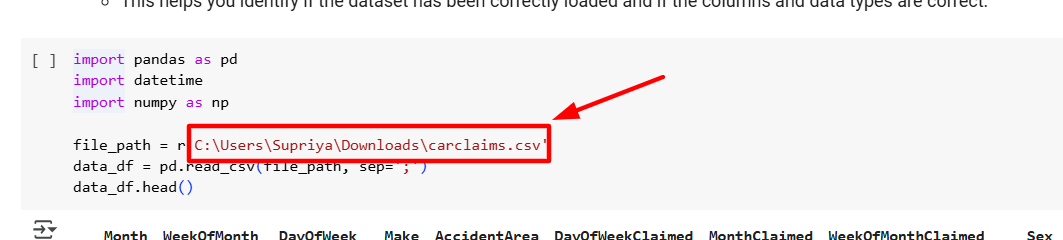

In [ ]:
import pandas as pd
import datetime
import numpy as np

file_path = r'C:\Users\Supriya\Downloads\carclaims.csv'
data_df = pd.read_csv(file_path, sep=';')
data_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


### Step 3: Set Up Categorical Features and Run Data Integrity Suite

**What We Are Doing in This Step**:  
We are defining which columns in the dataset are categorical and then running the **Deepchecks Data Integrity Suite** to check the data for issues such as missing values, outliers, and data type inconsistencies.

**Explanation**:
- **`categorical_features`**: These are columns in the dataset that contain categorical data. These features include things like `Month`, `Make`, `DayOfWeek`, and `AccidentArea`. By specifying these features, we inform **Deepchecks** that they should be treated as categorical during the integrity check.
- **`Dataset`**: The `Dataset` object is used to prepare the data for validation with **Deepchecks**. By passing in the DataFrame (`data_df`) and specifying the categorical features, we are setting up the data for integrity checks.
- **`data_integrity()`**: This is a built-in suite in **Deepchecks** that automatically checks for a variety of data quality issues such as missing values, correlations, feature distributions, and more.
- **`suite_result.show()`**: After running the integrity checks, the results are displayed. This will show any data quality issues found during the checks.

🔽 Run this cell

**Result**:
- The output will show the results of the data integrity checks. Possible results could include:
  - **Missing Values**: If any columns contain missing values, the suite will flag them, and you may need to handle these by imputation or removal.
  - **Feature Correlations**: Highly correlated features may be highlighted. If certain features are highly correlated (e.g., two columns containing similar data), it could lead to multicollinearity issues in model training.
  - **Outliers**: Any extreme values in the dataset will be flagged. These may need to be removed or adjusted depending on their impact.
  - **Data Type Inconsistencies**: The suite will check if any columns have mixed data types or other irregularities that need to be addressed.


In [ ]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity

# Assuming you know your categorical features
categorical_features = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed']

# Initialize the Dataset
dataset = Dataset(data_df, cat_features=categorical_features)

# Run the data integrity suite on the Dataset object
integ_suite = data_integrity()
suite_result = integ_suite.run(dataset)  # Using 'dataset' instead of 'data_df'
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_FOSUCG8RACRRCUM5620TTM3R9">Data Integrity Sui…

### Step 4: Handle Missing Values and Clean the Data

**What We Are Doing in This Step**:  
We are making changes to the dataset by filling missing values, removing specific rows, and transforming certain columns to standardize the data.

**Explanation**:
- **`data_clean_df = data_df.copy()`**: Creates a copy of the original dataset to ensure that the original data remains unchanged. The new copy, `data_clean_df`, will be used for data cleaning.
- **`data_clean_df['PastNumberOfClaims'] = data_clean_df['PastNumberOfClaims'].fillna('none')`**: Replaces missing values (NaN) in the `PastNumberOfClaims` column with the string `'none'`. This is useful if the column has missing data, and `'none'` can be used as a placeholder for cases with no previous claims.
- **`data_clean_df.drop(index=1146, inplace=True)`**: Drops the row at index 1146. This might be done because this row contains errors or irrelevant data that should not be included in the analysis.
- **`data_clean_df['Month'] = data_clean_df['Month'].replace({str(i): datetime.date(1900, i, 1).strftime('%b') for i in range(1, 13)})`**: This replaces numeric month values (e.g., "1", "2", etc.) with the corresponding month abbreviations (e.g., "Jan", "Feb", etc.). It converts month numbers to month names using `datetime` to ensure the data is more readable and consistent.
- **`data_clean_df['DayOfWeek'] = data_clean_df['DayOfWeek'].str.lower()`**: Converts all entries in the `DayOfWeek` column to lowercase. This helps standardize the data, making it easier to analyze without worrying about case sensitivity (e.g., "Monday" vs "monday").

🔽 Run this cell

**Result**:
- The dataset `data_clean_df` will now have the missing values in the `PastNumberOfClaims` column filled, the row with index 1146 removed, the `Month` column standardized with month abbreviations, and the `DayOfWeek` column converted to lowercase.
- These changes help clean the dataset and prepare it for further analysis or model training.



In [ ]:
data_clean_df = data_df.copy()
data_clean_df['PastNumberOfClaims'] = data_clean_df['PastNumberOfClaims'].fillna('none')
data_clean_df.drop(index=1146, inplace=True)
data_clean_df['Month'] = data_clean_df['Month'].replace({str(i): datetime.date(1900, i, 1).strftime('%b') for i in range(1, 13)})
data_clean_df['DayOfWeek'] = data_clean_df['DayOfWeek'].str.lower()

### Step 5: Define a Function to Handle String Values and Convert to Numerical Format

**What We Are Doing in This Step**:  
We are defining a custom function to convert string values into numerical values. This is especially useful when a column contains mixed types (e.g., numeric values stored as strings or ranges stored as text).

**Explanation**:
- **`import re`**: Imports the regular expression library, which is used for string matching and manipulation. Here, it's used to extract numbers from a string.
- **`str_to_mean(str_val)`**: This is a custom function designed to handle different string values and convert them to numeric values.
  - **`if isinstance(str_val, (int, float)):`**: If the value is already a number (either integer or float), it returns the value as is.
  - **`if str_val.lower() == 'none':`**: If the string is `'none'` (case insensitive), it returns `np.nan` (Not a Number) to indicate missing data.
  - **`if str_val == 'new':`**: If the string is `'new'`, it returns `0`, which might represent a newly created record or a default value.
  - **`parts = re.findall(r'\d+', str_val)`**: Uses a regular expression to find all sequences of digits in the string. For example, if the string is "1 to 3", it will extract the numbers `1` and `3`.
  - **`parts = list(map(int, parts))`**: Converts the extracted string numbers into integers.
  - **`if len(parts) < 1:`**: If no numbers are found, the function raises a `ValueError`, indicating that the string couldn't be processed correctly.
  - **`return np.mean(parts)`**: Returns the mean of the extracted numbers. This is useful when the value in the string represents a range (e.g., "1 to 3" would be converted to `2`).

🔽 Run this cell

**Result**:
- This function will convert string values in a column (such as "1 to 3", "none", or "new") into numerical values that can be used for further analysis or model training.
- For example, a column with strings like `"2 to 5"`, `"none"`, and `"new"` will be converted into numerical values like `3.5` (mean of 2 and 5), `np.nan` (for "none"), and `0` (for "new").
  
**Note**: This function is helpful for cleaning up columns with mixed data types and ensuring that the dataset is fully numerical, making it compatible with machine learning models.


In [ ]:
import re
def str_to_mean(str_val):
    if isinstance(str_val, (int, float)):
        return str_val
    if str_val.lower() == 'none':
        return np.nan
    if str_val == 'new':
        return 0
    parts = re.findall(r'\d+', str_val)
    parts = list(map(int, parts))
    if len(parts) < 1:
        raise ValueError(str_val)
    return np.mean(parts)

### Step 6: Apply the `str_to_mean` Function to Columns

**What We Are Doing in This Step**:  
We are applying the `str_to_mean` function to multiple columns in the dataset to convert mixed-type string values into numerical values. This step ensures that all columns are ready for analysis or model training by transforming text-based representations of numbers into actual numeric data.

**Explanation**:
- **`data_clean_df['VehiclePrice'] = data_clean_df['VehiclePrice'].apply(str_to_mean)`**: This applies the `str_to_mean` function to the `VehiclePrice` column. Any string values like "new" or ranges like "2 to 5" will be converted into a numerical value (e.g., the average of 2 and 5 for "2 to 5").
- The same logic applies to the other columns:
  - **`Days_Policy_Accident`**
  - **`Days_Policy_Claim`**
  - **`AgeOfVehicle`**
  - **`AgeOfPolicyHolder`**
  - **`NumberOfCars`**
  - **`PastNumberOfClaims`**

Each of these columns is being processed by the `str_to_mean` function to convert mixed text and numerical values into consistent numerical values.

🔽 Run this cell

**Result**:
- The output will update the `data_clean_df` DataFrame, transforming the columns into numeric values where possible.
  - **For example**:
    - A value like `"1 to 3"` in `VehiclePrice` would be replaced by `2` (mean of 1 and 3).
    - `"none"` would become `np.nan`, and `"new"` would become `0`.

**Note**:  
This step is crucial because many machine learning models require numeric input. By converting textual data into numerical form, we can ensure that these columns can be used effectively in model training and analysis.


In [ ]:
data_clean_df['VehiclePrice'] = data_clean_df['VehiclePrice'].apply(str_to_mean)
data_clean_df['Days_Policy_Accident'] = data_clean_df['Days_Policy_Accident'].apply(str_to_mean)
data_clean_df['Days_Policy_Claim'] = data_clean_df['Days_Policy_Claim'].apply(str_to_mean)
data_clean_df['AgeOfVehicle'] = data_clean_df['AgeOfVehicle'].apply(str_to_mean)
data_clean_df['AgeOfPolicyHolder'] = data_clean_df['AgeOfPolicyHolder'].apply(str_to_mean)
data_clean_df['NumberOfCars'] = data_clean_df['NumberOfCars'].apply(str_to_mean)
data_clean_df['PastNumberOfClaims'] = data_clean_df['PastNumberOfClaims'].apply(str_to_mean)

### Step 7: Handle Categorical Data in `AddressChange_Claim` Column

**What We Are Doing in This Step**:  
We are replacing the string values in the `AddressChange_Claim` column with numerical values. This helps convert categorical text data into a form that can be processed by machine learning models. Specifically, we are mapping the number of years or duration to numeric values.

**Explanation**:
- **`data_clean_df['AddressChange_Claim'] = data_clean_df['AddressChange_Claim'].replace({...})`**: This code replaces specific string values in the `AddressChange_Claim` column with numerical equivalents:
  - `'no change'` → `10`
  - `'4 to 8 years'` → `6`
  - `'2 to 3 years'` → `2.5`
  - `'1 year'` → `1`
  - `'under 6 months'` → `0.5`
- These mappings reflect the durations associated with address changes in the claims data. The goal is to quantify the information so that it can be used in numerical models.
- **`.infer_objects()`**: This method is used to infer the data types of the columns. After replacing string values with numeric equivalents, it ensures that the column's data type is appropriately set.

🔽 Run this cell

**Result**:
- The `AddressChange_Claim` column will now contain numeric values instead of strings, making it suitable for model training. For example:
  - `"no change"` becomes `10`
  - `"4 to 8 years"` becomes `6`

**Note**:  
This transformation is particularly useful when working with machine learning models that expect numerical data. By replacing categorical strings with numeric values, the data becomes compatible with the algorithms.


In [ ]:
data_clean_df['AddressChange_Claim'] = data_clean_df['AddressChange_Claim'].replace({
    'no change': 10,
    '4 to 8 years': 6,
    '2 to 3 years': 2.5,
    '1 year': 1,
    'under 6 months': 0.5
}).infer_objects()


### Step 8: Group Data by `Year` and `FraudFound_P` and Count the Entries

**What We Are Doing in This Step**:  
We are grouping the dataset by `Year` and `FraudFound_P` columns to count the number of occurrences of each combination. This step provides an overview of how the fraud detection data is distributed across different years and fraud outcomes (fraud found or not).

**Explanation**:
- **`data_clean_df[['Year', 'FraudFound_P', 'Month']]`**: This selects the relevant columns: `Year`, `FraudFound_P` (the target variable indicating whether fraud was found or not), and `Month`.
- **`.groupby(['Year', 'FraudFound_P'])`**: Groups the data by the `Year` and `FraudFound_P` columns. This allows us to aggregate the data based on these two features.
- **`.count()`**: Counts the number of occurrences in each group. It will return the number of entries for each combination of `Year` and `FraudFound_P`.


**Result**:
- The output will show a table with counts of entries for each combination of `Year` and `FraudFound_P`. The result will show how many records exist for each combination of year and whether fraud was found or not.

**Note**:  
This grouping and counting of data helps understand the distribution of fraud cases over the years and assists in preparing the data for model training.

🔽 Run this cell

In [ ]:
data_clean_df[['Year', 'FraudFound_P', 'Month']].groupby(['Year', 'FraudFound_P']).count()

Month
Year FraudFound_P       
1994 No             5732
     Yes             409
1995 No             4894
     Yes             301
1996 No             3870
     Yes             213

### Step 9: Split the Data into Training and Testing Sets

**What We Are Doing in This Step**:  
We are splitting the data into a training set and a testing set based on the `Year` column. The training set will contain data from the year 1994, and the testing set will contain data from years after 1994. This is done to simulate a real-world scenario where the model is trained on historical data and tested on newer data.

**Explanation**:
- **`train_df = data_clean_df[data_clean_df.Year == 1994]`**: This creates the `train_df` DataFrame, which contains all rows from the dataset where the `Year` is 1994. This dataset will be used to train the machine learning model.
- **`test_df = data_clean_df[data_clean_df.Year > 1994]`**: This creates the `test_df` DataFrame, which contains all rows from the dataset where the `Year` is greater than 1994. This dataset will be used to test the model on unseen data (post-1994).

🔽 Run this cell

**Result**:
- The `train_df` dataset will contain records from 1994, and the `test_df` dataset will contain records from years after 1994. This split helps simulate a scenario where the model is trained on past data and tested on future data to evaluate its generalization.


In [ ]:
train_df = data_clean_df[data_clean_df.Year == 1994]
test_df = data_clean_df[data_clean_df.Year > 1994]

### Step 10: Define Categorical Columns for the Dataset

**What We Are Doing in This Step**:  
We are defining a list of categorical columns (`cat_cols`) that will be used for analysis and model training. These columns represent categorical features in the dataset, and identifying them allows us to treat them appropriately during the analysis and modeling process.

**Explanation**:
- **`cat_cols`**: This is a list of column names in the dataset that contain categorical data. These features include things like `Month`, `DayOfWeek`, `Make`, and `AccidentArea`. These features should be treated as categorical during model training because they represent categories or groups, not continuous numerical values.
  
By defining these columns explicitly, we can ensure that machine learning models and integrity checks correctly handle them as categorical variables, which is important for both model performance and interpretability.



In [ ]:
from deepchecks.tabular import Dataset

cat_cols = ['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'BasePolicy']

### Step 11: Create Dataset Objects for Training and Testing

**What We Are Doing in This Step**:  
We are creating **Deepchecks Dataset** objects for the training and testing datasets. These objects are necessary for running Deepchecks’ data integrity checks, model evaluation, and validation tasks. The dataset objects are configured with information about the label (the target variable), datetime (for time-based validation), and categorical features.

**Explanation**:
- **`train_ds = Dataset(train_df, label='FraudFound_P', datetime_name='Year', cat_features=cat_cols)`**:
  - **`train_df`**: The training dataset containing records from the year 1994.
  - **`label='FraudFound_P'`**: Specifies that the target variable (the column we want to predict) is `FraudFound_P`, which indicates whether fraud was found or not.
  - **`datetime_name='Year'`**: Specifies that the `Year` column should be treated as the datetime feature, which is useful for time-series validation and analysis.
  - **`cat_features=cat_cols`**: Tells Deepchecks which columns should be treated as categorical features. This is important for proper handling during checks and model training.

- **`test_ds = Dataset(test_df, label='FraudFound_P', datetime_name='Year', cat_features=cat_cols)`**:
  - Creates the **test_ds** dataset object for the testing set (post-1994 data) with the same configuration as the training set.

🔽 Run this cell

**Result**:
- The `train_ds` and `test_ds` variables will now hold the training and testing dataset objects, respectively. These objects are now ready to be used for running data integrity checks, model evaluation, and further analysis using **Deepchecks**.



In [ ]:
train_ds = Dataset(train_df, label='FraudFound_P', datetime_name='Year', cat_features=cat_cols)
test_ds = Dataset(test_df, label='FraudFound_P', datetime_name='Year', cat_features=cat_cols)

### Step 12: Run Train-Test Validation Suite

**What We Are Doing in This Step**:  
We are using **Deepchecks'** `train_test_validation` suite to compare the performance of the model on both the training and testing datasets. This suite helps ensure that the model is not overfitting and that its performance is consistent between the training and test datasets.

**Explanation**:
- **`warnings.filterwarnings("ignore", category=FutureWarning)`**: This line suppresses any warning messages related to future deprecations in Python libraries that may not impact the current code execution. These warnings typically indicate that certain functions or features might be removed or altered in future versions of Python or libraries, but they do not affect the current functionality.
  
- **`train_test_validation()`**: This is a built-in suite in **Deepchecks** that validates the model’s performance between the training and test sets. It checks if the model's performance degrades significantly from the training data to the test data, which can indicate overfitting.
  
- **`res = train_test_validation().run(train_ds, test_ds)`**: Runs the train-test validation on the `train_ds` and `test_ds` dataset objects that were created earlier. The result is stored in `res`.
  
- **`res.show()`**: Displays the results of the validation. This will include any issues found, such as a significant drop in performance between the training and test sets, indicating overfitting or issues with the data.

🔽 Run this cell

**Result**:
- The output will show the results of the **train-test validation** suite. This will tell you:
  - Whether the model’s performance on the training set is consistent with its performance on the test set.
  - If there is a significant drop in performance, it may indicate that the model is overfitting to the training data.

**Note**:  
The validation checks for overfitting by comparing performance metrics (e.g., accuracy, F1 score) on the training and test datasets. If there is a large gap in performance, this could indicate that the model has learned to memorize the training data rather than generalize to unseen data.


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from deepchecks.tabular.suites import train_test_validation

res = train_test_validation().run(train_ds, test_ds)
res.show()


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_FOSDAC3VWI782KW79X1KA0C5V">Train Test Validat…

### Step 13: Remove Specific Car Brands from the Test Dataset

**What We Are Doing in This Step**:  
We are filtering out rows from the `test_df` dataset where the `Make` column contains specific car brands ('Ferrari' and 'Lexus'). This may be done to either focus the analysis on more common car brands or remove brands that might be outliers or have unique characteristics in the context of the dataset.

**Explanation**:
- **`test_df = test_df[~test_df.Make.isin(['Ferrari', 'Lexus'])]`**: This line of code removes rows from `test_df` where the `Make` column is either 'Ferrari' or 'Lexus'.
  - **`test_df.Make.isin(['Ferrari', 'Lexus'])`**: This checks if the `Make` column contains 'Ferrari' or 'Lexus'.
  - **`~`**: The tilde (`~`) is a negation operator. It inverts the condition, meaning it selects rows where the `Make` is **not** 'Ferrari' or 'Lexus'.
  - The result is that rows with these car brands are excluded from `test_df`, ensuring that the model is not influenced by these outliers or niche brands.

🔽 Run this cell

**Result**:
- The `test_df` dataset will now exclude any rows where the `Make` is either 'Ferrari' or 'Lexus'.
- This step may be necessary if these car brands are outliers or do not represent the broader population of cars that the model should generalize to.



In [ ]:
test_df = test_df[~test_df.Make.isin(['Ferrari', 'Lexus'])]

### Step 14: Create Dataset Objects with Additional Configuration

**What We Are Doing in This Step**:  
We are re-creating the **Deepchecks Dataset** objects for both the training and testing datasets. This time, we include additional parameters, such as the `index_name`, to uniquely identify each row in the dataset using the `PolicyNumber` column. This step ensures that Deepchecks handles the data correctly with the proper indexing and configuration.

**Explanation**:
- **`train_ds = Dataset(train_df, label='FraudFound_P', datetime_name='Year', index_name='PolicyNumber', cat_features=cat_cols)`**:
  - **`train_df`**: The training dataset.
  - **`label='FraudFound_P'`**: Specifies the target variable that the model aims to predict (i.e., whether fraud was found).
  - **`datetime_name='Year'`**: Specifies that the `Year` column is the datetime feature, which can be useful for time-based validation.
  - **`index_name='PolicyNumber'`**: Specifies that the `PolicyNumber` column should be used as the unique index for each row in the dataset. This is important for tracking each individual policy.
  - **`cat_features=cat_cols`**: Defines the categorical features (as previously set).

- **`test_ds = Dataset(test_df, label='FraudFound_P', datetime_name='Year', index_name='PolicyNumber', cat_features=cat_cols)`**:
  - Creates the **test_ds** dataset object for the test data (post-1994) with the same configuration as the training set.

🔽 Run this cell

**Result**:
- The `train_ds` and `test_ds` dataset objects will now have the correct configuration for handling categorical features, datetime information, and the unique `PolicyNumber` index.
- These objects are now ready to be used for validation, checks, and model training/evaluation within **Deepchecks**.

**Note**:  
Including the `index_name='PolicyNumber'` is important to ensure that each row is uniquely identified by its policy number, which can be useful in tracking specific policies or for specific validation checks in the context of this dataset.


In [ ]:
train_ds = Dataset(train_df, label='FraudFound_P', datetime_name='Year', index_name='PolicyNumber', cat_features=cat_cols)
test_ds = Dataset(test_df, label='FraudFound_P', datetime_name='Year', index_name='PolicyNumber', cat_features=cat_cols)

### Step 15: Run Train-Test Validation Suite Again

**What We Are Doing in This Step**:  
We are running the **train-test validation** suite again, but this time using the updated **Deepchecks Dataset** objects, which include the `index_name` (`PolicyNumber`) and other configurations. This step helps validate that the model performs consistently across both the training and testing datasets, ensuring that the model does not overfit.

**Explanation**:
- **`train_test_validation()`**: This is a **Deepchecks** suite that evaluates whether the model performs similarly on both the training and testing datasets. It checks for overfitting by comparing metrics like accuracy, precision, and recall across both datasets.
- **`res = train_test_validation().run(train_ds, test_ds)`**: Runs the **train-test validation** on the `train_ds` and `test_ds` dataset objects. The results are stored in the `res` variable.
- **`res.show()`**: Displays the results of the validation, showing if the model's performance on the test set is consistent with its performance on the training set.

🔽 Run this cell

**Result**:
- The output will display the results of the train-test validation, highlighting whether there is any significant performance drop between the training and testing datasets. The model is expected to perform similarly on both datasets if it is generalizing well.
  - If there is a **large drop** in performance from training to testing, it may indicate **overfitting**.



In [ ]:
res = train_test_validation().run(train_ds, test_ds)
res.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_VO0OTK59R4V37CVPFSDZOEUDX">Train Test Validat…

### Step 16: Check if All Validation Conditions are Passed

**What We Are Doing in This Step**:  
We are checking whether all the validation conditions from the **train-test validation** suite have passed. This helps us quickly confirm if the model's performance is consistent and if there are no issues like overfitting or significant degradation between the training and test sets.

**Explanation**:
- **`all(res.results[i].passed_conditions() for i in range(len(res.results)))`**: This line checks whether all conditions in the `train_test_validation` results have passed. It loops through each result in `res.results` and checks the `passed_conditions()` method, which returns `True` if the validation condition for that result has passed.
  - **`res.results[i]`**: Refers to each individual result from the train-test validation suite.
  - **`passed_conditions()`**: This method returns `True` if the specific condition (e.g., performance consistency) is met, and `False` if it is not.

🔽 Run this cell

**Result**:
- The result will be `True` if all the conditions have passed, meaning the model's performance on the test set is consistent with the training set.
- If any condition fails (e.g., a significant performance drop), it will return `False`, and you may need to take corrective actions like adjusting the model or revisiting the data preprocessing steps.



In [ ]:
all(res.results[i].passed_conditions() for i in range(len(res.results)))

True


### Step 17: Train the CatBoost Classifier Model

**What We Are Doing in This Step**:  
We are training a **CatBoost Classifier** model on the training data (`train_df`) to predict whether fraud was found (`FraudFound_P`). CatBoost is a powerful gradient boosting algorithm that handles categorical features natively.

**Explanation**:
- **`model = CatBoostClassifier(iterations=100, random_seed=42, verbose=0)`**:
  - **`iterations=100`**: Specifies the number of boosting iterations (trees) the model should run. In this case, it will run 100 iterations.
  - **`random_seed=42`**: Sets a random seed for reproducibility, ensuring that the results can be replicated.
  - **`verbose=0`**: Suppresses the output of each iteration during model training. If set to `1`, it would print progress information for each iteration.
  
- **`model.fit(train_df.drop(columns=['FraudFound_P', 'Year', 'PolicyNumber']), train_df['FraudFound_P'], cat_features=cat_cols)`**:
  - **`train_df.drop(columns=['FraudFound_P', 'Year', 'PolicyNumber'])`**: Drops the columns `FraudFound_P`, `Year`, and `PolicyNumber` from the training data since they are either irrelevant to the model or are the target variable (`FraudFound_P`).
  - **`train_df['FraudFound_P']`**: Specifies the target variable, `FraudFound_P`, which is the column that we are trying to predict (whether fraud was found).
  - **`cat_features=cat_cols`**: Informs the model that the specified columns in `cat_cols` are categorical features, which helps CatBoost handle them properly.

🔽 Run this cell

**Result**:
- The CatBoost model will be trained on the provided training data (`train_df`) using the specified parameters.
- After training, the model will be ready to make predictions on new data (e.g., the test dataset).




In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100, random_seed=42, verbose=0)
model.fit(train_df.drop(columns=['FraudFound_P', 'Year', 'PolicyNumber']), train_df['FraudFound_P'],
          cat_features=cat_cols)

### Step 18: Evaluate the Model Using Deepchecks

**What We Are Doing in This Step**:  
We are using **Deepchecks'** `model_evaluation` suite to evaluate the performance of the trained CatBoost model on both the training and testing datasets. This step will help us assess how well the model generalizes to unseen data and check if it has overfitted to the training data.

**Explanation**:
- **`model_evaluation()`**: This is a **Deepchecks** suite used to evaluate a machine learning model’s performance. It provides several checks, such as accuracy, confusion matrix, and other performance metrics to assess how well the model is performing.
- **`res = model_evaluation().run(train_ds, test_ds, model)`**:
  - **`train_ds`**: The training dataset.
  - **`test_ds`**: The test dataset.
  - **`model`**: The trained **CatBoostClassifier** model.
  - The `model_evaluation` suite will evaluate the model on both datasets (train and test) and return the results.
- **`res.show()`**: Displays the evaluation results, which typically include performance metrics such as accuracy, F1 score, confusion matrix, and more.

🔽 Run this cell

**Result**:
- The output will display the evaluation results for the **CatBoost model**, including:
  - **Accuracy**: How well the model is predicting fraud in both the training and testing datasets.
  - **Confusion Matrix**: A matrix showing true positives, true negatives, false positives, and false negatives, helping to assess the classification performance in more detail.
  - **Other Metrics**: Depending on the configuration, other performance metrics may also be included, such as precision, recall, and F1 score.


In [ ]:
from deepchecks.tabular.suites import model_evaluation

res = model_evaluation().run(train_ds, test_ds, model)
res.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_1P6HDU6I87FF5X5226LHS1N8X">Model Evaluation S…

### Step 19: Create and Run a Custom Performance Suite

**What We Are Doing in This Step**:  
We are creating a custom performance suite using **Deepchecks** to evaluate the model in more detail. The custom suite includes multiple checks, such as train-test performance, boosting overfitting, and confusion matrix. This comprehensive evaluation ensures the model is performing well and is not overfitting.

**Explanation**:
- **`Suite('My Custom Performance Suite', ...)`**: Creates a custom suite with a name ('My Custom Performance Suite') and adds several checks to evaluate the model's performance thoroughly.
  
  - **`TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.1)`**: This check ensures that the model’s performance degradation between the training and test datasets is less than 10%. If the performance drops by more than 10%, it may indicate overfitting or that the model is not generalizing well to new data.
  
  - **`ConfusionMatrixReport()`**: This check generates a confusion matrix, which shows how well the model is performing in classifying fraud cases (true positives, false positives, true negatives, false negatives).
  
  - **`BoostingOverfit(alternative_scorer=['f1', 'f1']).add_condition_test_score_percent_decline_less_than(0.01)`**: This checks whether the model is overfitting, specifically for boosting models like CatBoost. It ensures that the performance on the test set does not decline by more than 1% compared to the training set.
  
  - **`SimpleModelComparison().add_condition_gain_greater_than(0.1)`**: This compares the performance of the trained model with a simple baseline model, ensuring that the complex model is performing significantly better than the baseline (greater than 10% improvement).

- **`custom_suite.run(train_ds, test_ds, model)`**: Runs the custom suite using the `train_ds`, `test_ds`, and the trained model. This evaluates the model on multiple conditions defined above.

🔽 Run this cell

**Result**:
- The custom performance suite will generate a detailed report, showing the results for each of the checks:
  - **Train-Test Performance**: Ensures that the model’s performance degradation is minimal.
  - **Confusion Matrix**: Provides a breakdown of classification performance (e.g., accuracy, false positives, and true positives).
  - **Boosting Overfitting**: Checks if the model has overfitted during training.
  - **Simple Model Comparison**: Compares the performance of the complex model with a simple baseline model to ensure that the complexity is justified.



In [ ]:
from deepchecks.tabular import Suite
from deepchecks.tabular.checks import TrainTestPerformance, BoostingOverfit, SimpleModelComparison, ConfusionMatrixReport

custom_suite = Suite('My Custom Performance Suite',
                     TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.1),
                     ConfusionMatrixReport(),
                     BoostingOverfit(alternative_scorer=['f1', 'f1']).add_condition_test_score_percent_decline_less_than(0.01),
                     SimpleModelComparison().add_condition_gain_greater_than(0.1),
                    )

custom_suite.run(train_ds, test_ds, model)

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_P14H5HTWVXGQVEN9L201SRK6W">My Custom Performa…

### Step 20: Train a Tuned CatBoost Classifier Model

**What We Are Doing in This Step**:  
We are training a **CatBoost Classifier** model with hyperparameters adjusted for better performance. The hyperparameters are tuned to control the model’s learning rate, complexity, and other aspects to improve generalization and prevent overfitting.

**Explanation**:
- **`model = CatBoostClassifier(...)`**: We define the model with the following hyperparameters:
  - **`iterations=50`**: Specifies the number of boosting iterations (trees). Here, we use 50 iterations to balance model training time and performance.
  - **`random_seed=42`**: This sets the random seed for reproducibility, ensuring the results are consistent across different runs.
  - **`verbose=0`**: Disables verbose output, so the training process does not display progress for each iteration.
  - **`learning_rate=0.2`**: The learning rate controls how much the model’s weights are updated in each iteration. A lower learning rate can improve model generalization but may require more iterations to converge.
  - **`colsample_bylevel=0.03`**: Specifies the fraction of features to sample at each level of the boosting trees. This helps in preventing overfitting by ensuring that the model does not use all features at every split.
  - **`subsample=0.5`**: The fraction of samples to be used for each tree. This introduces randomness in the training process and reduces the likelihood of overfitting.
  - **`depth=4`**: The maximum depth of the trees. Limiting tree depth can help reduce overfitting, especially when the model is complex.

- **`model.fit(...)`**:
  - **`train_df.drop(columns=['FraudFound_P', 'Year', 'PolicyNumber'])`**: This removes the target variable (`FraudFound_P`), `Year`, and `PolicyNumber` columns from the training data because they are not needed for model training.
  - **`train_df['FraudFound_P']`**: This specifies the target variable, which is what the model is trying to predict (whether fraud is found).
  - **`cat_features=cat_cols`**: Specifies which columns are categorical, so **CatBoost** can handle them properly without the need for one-hot encoding.

🔽 Run this cell

**Result**:
- The **CatBoost** model will be trained on the modified training dataset (`train_df`), and it will attempt to predict whether fraud was found based on the specified hyperparameters.
- The model will take into account categorical features and apply the tuned settings to ensure better performance.



In [ ]:
model = CatBoostClassifier(iterations=50, random_seed=42, verbose=0, learning_rate=0.2, colsample_bylevel=0.03, subsample=0.5,
                       depth=4)

model.fit(train_df.drop(columns=['FraudFound_P', 'Year', 'PolicyNumber']), train_df['FraudFound_P'],
          cat_features=cat_cols)

### Step 21: Drop Rows with NaN Values in Specific Columns

**What We Are Doing in This Step**:  
We are removing rows from the `data_clean_df` dataset that contain **NaN (missing) values** in specific columns (`Days_Policy_Accident`, `Days_Policy_Claim`, `PastNumberOfClaims`). This is necessary to ensure that we are working with a complete dataset, as many machine learning algorithms cannot handle missing values directly.

**Explanation**:
- **`data_clean_df.dropna(subset=['Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims'], inplace=True)`**:
  - **`subset=['Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims']`**: Specifies that rows containing NaN values in any of these columns will be removed. The `dropna()` function will only drop rows where at least one of the specified columns contains a missing value.
  - **`inplace=True`**: This modifies the `data_clean_df` DataFrame directly, removing the rows from the original dataset.

- **`print(data_clean_df.isna().sum())`**:
  - **`data_clean_df.isna()`**: Returns a DataFrame of the same shape as `data_clean_df` with `True` where a value is missing (NaN) and `False` otherwise.
  - **`.sum()`**: Sums the `True` values for each column, which gives the number of missing (NaN) values in each column.
  - **`print()`**: Displays the number of remaining NaN values for each column in the dataset.

🔽 Run this cell

**Result**:
- The rows with NaN values in the specified columns will be removed, and the output will show the count of remaining missing values in each column.
  - **Expected Output**: After running the code, you should see that the columns `Days_Policy_Accident`, `Days_Policy_Claim`, and `PastNumberOfClaims` no longer contain any NaN values. Other columns might still have missing values depending on the dataset.


**Note**:  
Dropping rows with missing values is a common data cleaning step. However, it can lead to a loss of data if many rows have missing values in the specified columns. Alternatively, you could consider imputing missing values rather than removing rows, depending on the nature of the dataset.


In [ ]:
# Dropping rows with NaN values in specific columns
data_clean_df.dropna(subset=['Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims'], inplace=True)

# Verify that the rows were dropped
print(data_clean_df.isna().sum())  # Check how many NaN values remain in each column


Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound_P            0
dtype: int64


### Step 22: Clean the Data and Run Full Validation Suite

**What We Are Doing in This Step**:  
We are cleaning the training and testing datasets by dropping rows with missing values in specific columns (`Days_Policy_Accident`, `Days_Policy_Claim`, `PastNumberOfClaims`). After cleaning the data, we re-create the **Deepchecks Dataset** objects and run the **full validation suite** to evaluate the overall quality of the datasets and model performance.

**Explanation**:
- **`train_df = train_ds.data` and `test_df = test_ds.data`**:
  - These lines extract the underlying data from the `train_ds` and `test_ds` dataset objects created earlier. These DataFrames are used for further manipulation and cleaning.
  
- **`train_df.dropna(subset=['Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims'], inplace=True)`**:
  - Drops rows with missing values in the specified columns in the training data (`train_df`).
  
- **`test_df.dropna(subset=['Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims'], inplace=True)`**:
  - Drops rows with missing values in the specified columns in the testing data (`test_df`).

- **Re-create the Dataset objects**: After cleaning the data, we need to re-create the **Deepchecks Dataset** objects (`train_ds` and `test_ds`), which will be used for validation and model evaluation.
  - **`train_ds = Dataset(train_df, label='FraudFound_P', datetime_name='Year', cat_features=cat_cols)`**: Recreates the training dataset object after cleaning.
  - **`test_ds = Dataset(test_df, label='FraudFound_P', datetime_name='Year', cat_features=cat_cols)`**: Recreates the test dataset object after cleaning.

- **`result = full_suite().run(train_ds, test_ds)`**:
  - This line runs the **Deepchecks full suite** on the cleaned `train_ds` and `test_ds` dataset objects. The full suite includes a variety of validation checks, such as data integrity, model evaluation, and performance analysis.
  
- **`result.show()`**: Displays the results of the full suite validation, including any issues related to the dataset and model performance.

🔽 Run this cell

**Result**:
- The output will display the results of the **full suite**, which will include various checks like:
  - **Data Integrity**: Checks for missing values, data types, correlations, and outliers.
  - **Model Evaluation**: Performance metrics such as accuracy, F1 score, and confusion matrix.
  - **Train-Test Performance**: Ensures that the model generalizes well from training data to test data.

**Note**:  
The **full suite** gives a comprehensive view of the model’s performance and the data's quality, helping you identify any potential issues that might impact model accuracy or reliability. If any issues are found, they should be addressed to ensure the model is working optimally.


In [ ]:
from deepchecks.tabular.suites import full_suite
from deepchecks.tabular import Dataset

# Dropping rows with NaN values in specific columns for both train and test datasets
train_df = train_ds.data
test_df = test_ds.data

# Dropping rows with NaN values in specific columns in both train and test datasets
train_df.dropna(subset=['Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims'], inplace=True)
test_df.dropna(subset=['Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims'], inplace=True)

# Re-create the Dataset objects after cleaning the data
train_ds = Dataset(train_df, label='FraudFound_P', datetime_name='Year', cat_features=cat_cols)
test_ds = Dataset(test_df, label='FraudFound_P', datetime_name='Year', cat_features=cat_cols)

# Run the full suite on the cleaned datasets
result = full_suite().run(train_ds, test_ds)
result.show()  # This will display the results of the suite


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_6MQKD6649POJXA6H6VBEML4X3">Full Suite</h1>\n<…

### Step 23: Run a Custom Performance Suite

**What We Are Doing in This Step**:  
We are creating and running a **custom performance suite** to evaluate the model's performance across various checks. The custom suite includes several important evaluations, such as train-test performance, overfitting checks, confusion matrix, and model comparison. This step ensures that the model is not only performing well but is also generalizing effectively to unseen data.

**Explanation**:
- **`Suite('My Custom Performance Suite', ...)`**: We define a custom suite with the name `'My Custom Performance Suite'`. This suite contains multiple checks to evaluate the model in-depth.
  - **`TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.1)`**: Checks that the relative degradation between the training and testing performance is less than 10%. This ensures that the model generalizes well from training data to test data.
  - **`ConfusionMatrixReport()`**: Provides a confusion matrix, which breaks down the model’s predictions into true positives, true negatives, false positives, and false negatives. This helps assess the accuracy of the model’s classifications.
  - **`BoostingOverfit(alternative_scorer=['f1', 'f1']).add_condition_test_score_percent_decline_less_than(0.01)`**: Ensures that the model, specifically a boosting model like CatBoost, does not overfit. This check compares the model’s performance on the test set with the training set and makes sure the test score does not decline by more than 1%.
  - **`SimpleModelComparison().add_condition_gain_greater_than(0.1)`**: Compares the trained model with a simple baseline model to ensure the complex model performs better by at least 10% compared to the baseline.

- **`custom_suite.run(train_ds, test_ds, model)`**: This line runs the custom suite using the `train_ds`, `test_ds`, and the trained model. It will evaluate the model based on the checks defined in the suite.

🔽 Run this cell

**Result**:
- The output will display a report from the custom performance suite, including:
  - **Train-Test Performance**: Shows whether the model's performance degradation between training and testing is acceptable.
  - **Confusion Matrix**: Provides a breakdown of how well the model is classifying fraud cases.
  - **Boosting Overfitting**: Assesses whether the model is overfitting by comparing the performance on training and test data.
  - **Simple Model Comparison**: Compares the performance of the trained model to a simple baseline to ensure that the model adds value.

**Note**:  
This custom suite allows you to perform a comprehensive evaluation of the model’s performance. It ensures the model is well-generalized, not overfitting, and performs better than a simple baseline. If any conditions are not met, you may need to revisit model tuning or data preprocessing to improve performance.


In [ ]:
custom_suite = Suite('My Custom Performance Suite',
                     TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.1),
                     ConfusionMatrixReport(),
                     BoostingOverfit(alternative_scorer=['f1', 'f1']).add_condition_test_score_percent_decline_less_than(0.01),
                     SimpleModelComparison().add_condition_gain_greater_than(0.1),
                    )

custom_suite.run(train_ds, test_ds, model)

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_NYT8MXBCZ2XSRWLGFYJ4FJMGQ">My Custom Performa…